# Plotting With Pandas Exercise
This set of exercises will require you to use Pandas' plotting functionality alongside some matplotlib methods.  

* **All charts use the `billboard_charts.csv` dataset.**  
* **Import that dataset and parse the `date` column as a date.**
* **Use the matplotlib theme `ggplot`**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
billboard = pd.read_csv("/content/drive/MyDrive/data/billboard_charts.csv",parse_dates=["date"])
plt.style.use("ggplot")
billboard

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
1,2021-11-06,2,Stay,The Kid LAROI & Justin Bieber,2.0,1,16
2,2021-11-06,3,Industry Baby,Lil Nas X & Jack Harlow,3.0,1,14
3,2021-11-06,4,Fancy Like,Walker Hayes,4.0,3,19
4,2021-11-06,5,Bad Habits,Ed Sheeran,5.0,2,18
...,...,...,...,...,...,...,...
330082,1958-08-04,96,Over And Over,Thurston Harris,NaN,96,1
330083,1958-08-04,97,I Believe In You,Robert & Johnny,NaN,97,1
330084,1958-08-04,98,Little Serenade,The Ames Brothers,NaN,98,1
330085,1958-08-04,99,I'll Get By (As Long As I Have You),Billy Williams,NaN,99,1


## Part 1

Create the bar plot seen in the image below.  It visualizes the top 10 artists who have spent the most weeks at number 1 in the dataset.

* Notice the customized title
* The figure is 8x6
* Add in the x-axis label
* The plot uses the ggplot matplotlib theme
* The bars have a black edge with a width of 3.  You'll need to add that in yourself!



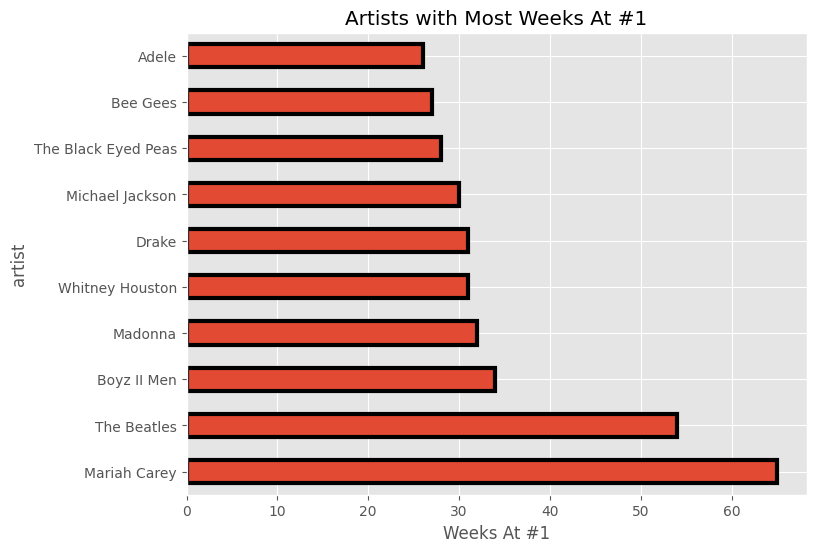

In [ ]:
billboard[billboard["rank"]==1]["artist"].value_counts().head(10).plot(kind="barh",
                                                                       title="Artists with Most Weeks At #1",
                                                                       figsize=(8,6),
                                                                       edgecolor="black",
                                                                       linewidth=3,
                                                                       xlabel="Weeks At #1")
plt.show()

## Part 2

Please create the pie chart seen in the image below.  It visualizes the various artists who charted with the song "Please Mr. Postman".  

* Add in the custom title
* Use this list of colors: `colors = ["#6c5ce7","#00cec9", "#74b9ff"]`
* Explode the "Gentle Persuasion" slice by 0.1



<Axes: title={'center': 'Please Mr. Postman versions'}, ylabel='Artists'>

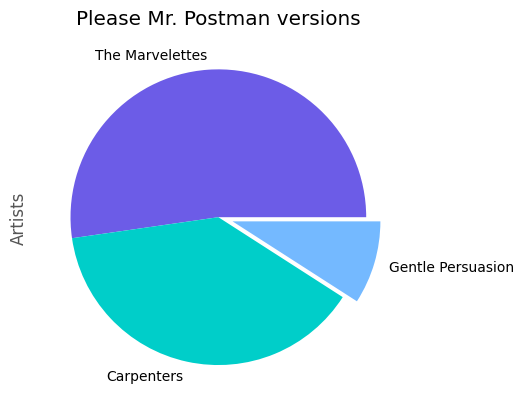

In [ ]:
billboard[billboard["song"]=="Please Mr. Postman"]["artist"].value_counts().plot(kind="pie",
                                                                                 ylabel="Artists",
                                                                                 title="Please Mr. Postman versions",
                                                                                 explode=(0,0,0.1),
                                                                                 colors=["#6c5ce7","#00cec9", "#74b9ff"])

## Part 3
Create the line plot seen in the image below. It visualizes the performance of the song "Blinding Lights"

* The figure is 9x5
* The line color is `#a29bfe`
* To invert the y-axis (so that rank 1 is the highest value), use: `plt.gca().invert_yaxis()`



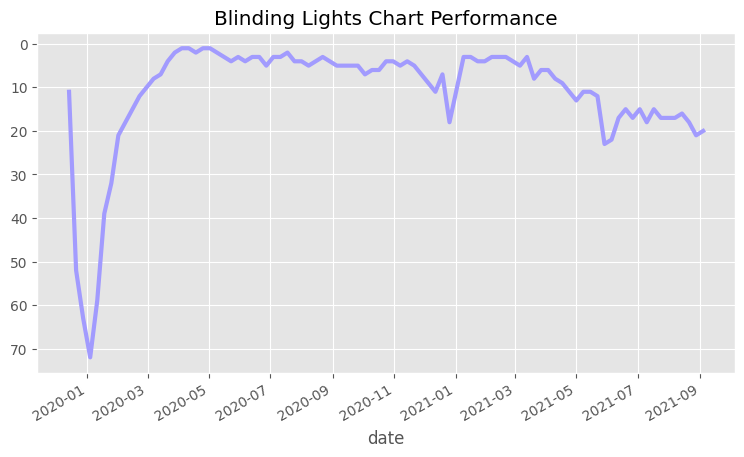

In [ ]:
billboard[billboard["song"]=="Blinding Lights"].set_index("date")["rank"].plot(kind='line',
                                                                                  color="#a29bfe",
                                                                                  figsize=(9,5),
                                                                                  linewidth=3,
                                                                                  title="Blinding Lights Chart Performance")

plt.gca().invert_yaxis()

## Part 4

Create the line plot seen in the image below.  It shows the chart performance (rank) of the following songs:

* All I Want For Christmas Is You by Mariah Carey
* Rockin' Around The Christmas Tree by Brenda Lee
* Jingle Bell Rock by Bobby Helms

**The date range spans from 2016-12-25 to 2021-01-01**

Notice the customized x-axis tick marks, the legend, the title, and the axis labels! Also the figure is `10x7`

To invert the y-axis, use `plt.gca().invert_yaxis()`



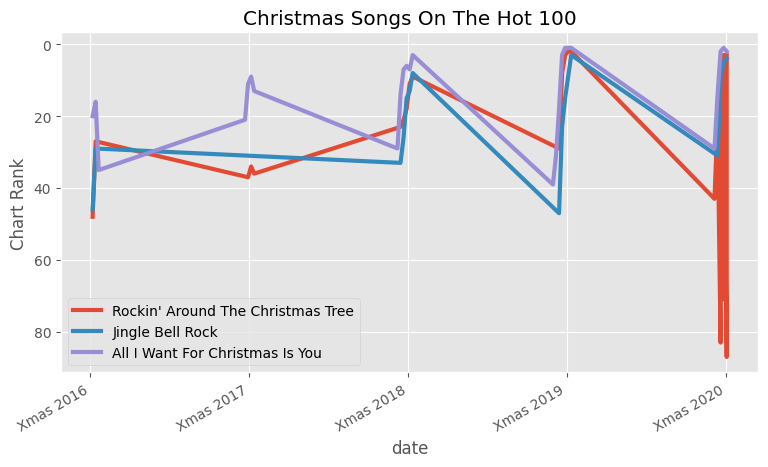

In [12]:
df = billboard[billboard["date"].between("2016-12-25","2021-01-01")]

df[df["song"]=="Rockin' Around The Christmas Tree"].set_index("date")["rank"].plot(kind='line',
                                                                                  label="Rockin' Around The Christmas Tree",
                                                                                  figsize=(10,7),
                                                                                  linewidth=3)

df[df["song"]=="Jingle Bell Rock"].set_index("date")["rank"].plot(kind='line',
                                                                                  label="Jingle Bell Rock",
                                                                                  figsize=(9,5),
                                                                                  linewidth=3)

df[df["song"]=="All I Want For Christmas Is You"].set_index("date")["rank"].plot(kind='line',
                                                                                  ylabel="Chart Rank",
                                                                                  label="All I Want For Christmas Is You",
                                                                                  figsize=(9,5),
                                                                                 title="Christmas Songs On The Hot 100",
                                                                                  linewidth=3)

plt.xticks(
    ["2016-12-25", "2017-12-25","2018-12-25","2019-12-25","2020-12-25"],
    labels=["Xmas 2016", "Xmas 2017","Xmas 2018","Xmas 2019","Xmas 2020"]
)
plt.legend()
plt.gca().invert_yaxis()

## Part 5

Create the visualization seen in the image below.  It shows the top 8 songs that spent the most time on the Billboard charts (at any position) for each of the 4 Beatle's solo acts:
* John Lennon
* Wings
* George Harrison
* Ringo Starr

The details:
* 2 rows, 2 columns
* Figure is 14x8
* The main title has a fontsize of 20
* Notice the colors of each plot and its corresponding title!
* Colors are:
    * red: #fc5c65
    * orange: #fd9644
    * blue: #2bcbba
    * green: #26de81
    


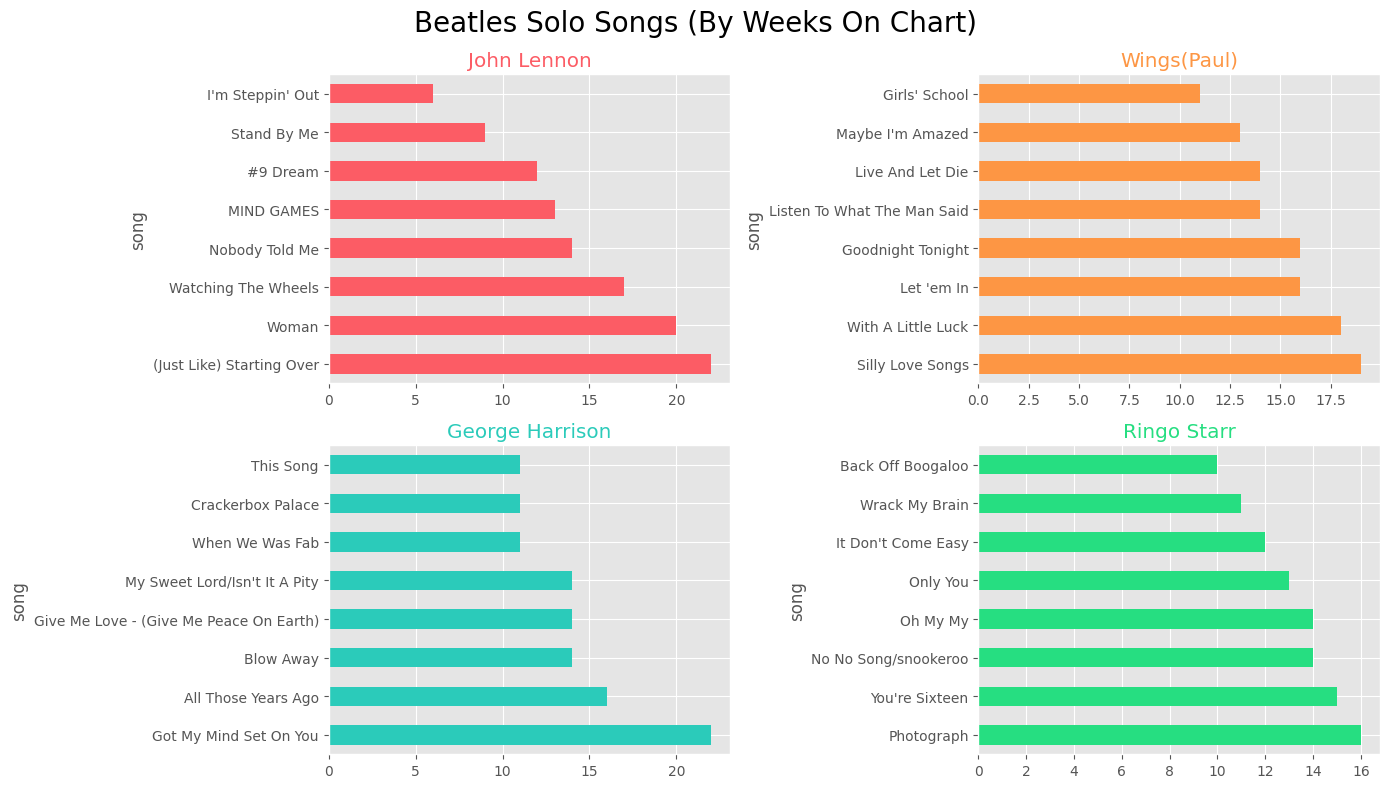

In [24]:
john = billboard[billboard["artist"]=="John Lennon"]["song"].value_counts().sort_values(ascending=False).head(8)
wing = billboard[billboard["artist"]=="Wings"]["song"].value_counts().sort_values(ascending=False).head(8)
george = billboard[billboard["artist"]=="George Harrison"]["song"].value_counts().sort_values(ascending=False).head(8)
ringo = billboard[billboard["artist"]=="Ringo Starr"]["song"].value_counts().sort_values(ascending=False).head(8)

fig, axs = plt.subplots(2,2, figsize=(14,8))
fig.suptitle("Beatles Solo Songs (By Weeks On Chart)", fontsize=20 )

john.plot(kind="barh", ax=axs[0][0], color="#fc5c65")
axs[0][0].set_title("John Lennon", color="#fc5c65")

wing.plot(kind="barh", ax=axs[0][1], color="#fd9644")
axs[0][1].set_title("Wings(Paul)", color="#fd9644")

george.plot(kind="barh", ax=axs[1][0], color="#2bcbba")
axs[1][0].set_title("George Harrison", color="#2bcbba")

ringo.plot(kind="barh", ax=axs[1][1], color="#26de81")
axs[1][1].set_title("Ringo Starr", color="#26de81")


plt.tight_layout()